In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import math
from PIL import Image
import os

In [2]:
df = pd.read_csv("../Data_Generation/Data_files/bfs_heisenberg_w_mult_paths.csv")
og_df = pd.read_csv("../Data_Generation/Data_files/bfs_heisenberg_w_mult_paths.csv")

In [3]:
# just the duplicated rows
# adapted from ChatGPT
df = df[df.duplicated(subset=['val1', 'val2', 'val3'], keep=False)]
df

,val1,val2,val3,num_steps,last_matrix
4,-1,-1,-23,26,2
7,1,1,-23,26,2
11,0,1,-24,26,0
12,-2,2,-24,26,3
13,-2,-2,-22,26,2
...,...,...,...,...,...
359150,0,1,2,4,2
359151,-1,1,1,4,1
359152,2,-1,0,4,3
359156,1,-2,-1,4,1


In [4]:
few = df[(df['val1']==-1) & (df['val2']==-1) & (df['val3']==-23)]
few

,val1,val2,val3,num_steps,last_matrix
4,-1,-1,-23,26,2
31449,-1,-1,-23,26,3
31782,-1,-1,-23,26,1


In [5]:
df.groupby(['val1', 'val2', 'val3']).size() > 1

val1  val2  val3
-24   -46   2       True
      -45   2       True
      -44   2       True
      -43   2       True
      -42   2       True
                    ... 
 24    42   2       True
       43   2       True
       44   2       True
       45   2       True
       46   2       True
Length: 142860, dtype: bool

In [7]:
counts_for_each = dict()

def apply_my_fxn(row):
    cur_tuple = (row['val1'], row['val2'], row['val3'])
    if cur_tuple not in counts_for_each:
        counts_for_each[cur_tuple] = [row['last_matrix']]
    else:
        counts_for_each[cur_tuple].append(row['last_matrix'])

df.apply(apply_my_fxn, axis=1)

4         None
7         None
11        None
12        None
13        None
          ... 
359150    None
359151    None
359152    None
359156    None
359159    None
Length: 307496, dtype: object

In [8]:
def counts_for_each_to_row(row):
    cur_tuple = (row['val1'], row['val2'], row['val3'])
    return counts_for_each[cur_tuple]

df['all_possible_last_matrices'] = df.apply(counts_for_each_to_row, axis=1)

In [9]:
df['all_possible_last_matrices']

4         [2, 3, 1]
7         [2, 3, 0]
11           [0, 3]
12           [3, 1]
13        [2, 3, 1]
            ...    
359150       [1, 2]
359151       [3, 1]
359152       [0, 3]
359156       [3, 1]
359159       [2, 1]
Name: all_possible_last_matrices, Length: 307496, dtype: object

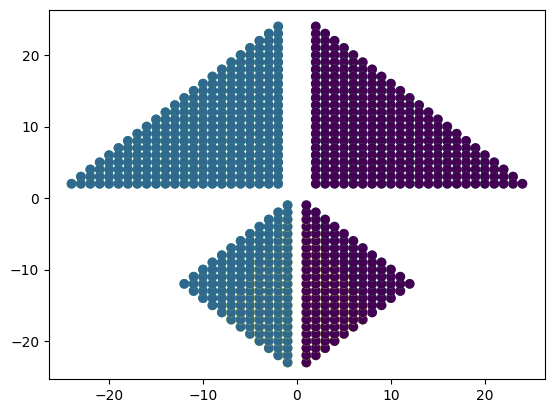

In [14]:
parabola = df[df['val1']==df['val2']]
plt.scatter(x=parabola['val1'], y=parabola['val3'], c=parabola['last_matrix'])

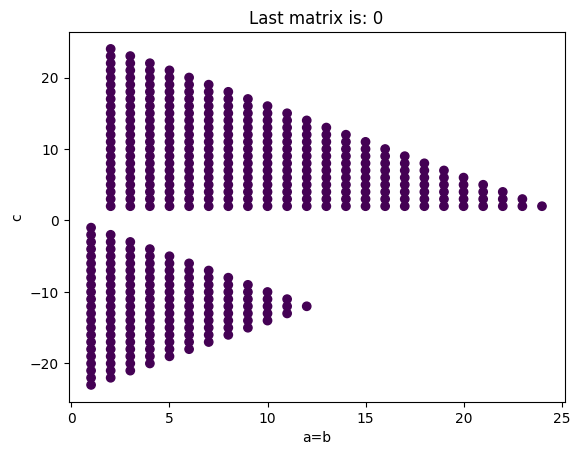

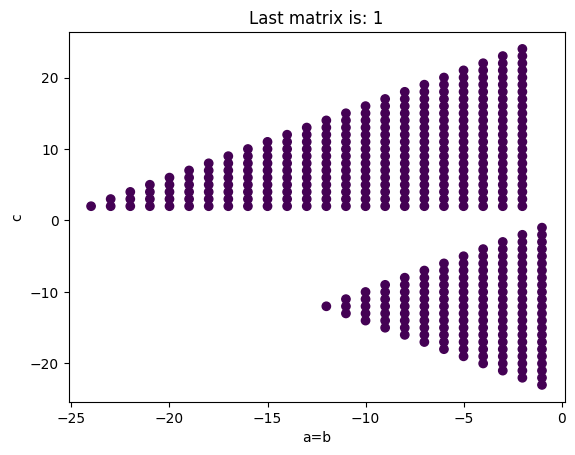

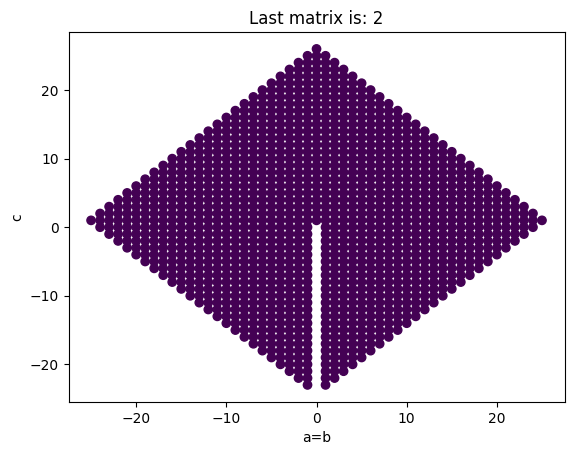

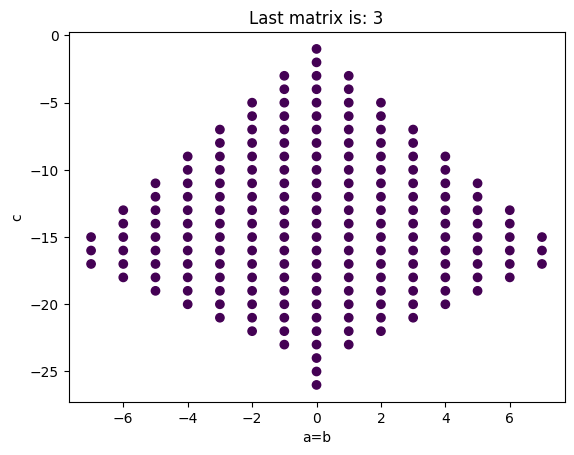

In [52]:
filtered_df = og_df[og_df['val1']==og_df['val2']]

for i in [0, 1, 2, 3]:
    more_filter = filtered_df[filtered_df['last_matrix']==i]
    plt.scatter(x=more_filter['val1'], y=more_filter['val3'], c=more_filter['last_matrix'])
    plt.xlabel("a=b")
    plt.ylabel("c")
    plt.title(f"Last matrix is: {i}")
    plt.show()